## Astro 304 "Galaxies"

### Morphology and properties of galaxy light distribution

In [11]:
# setup notebook for inline figures
%matplotlib inline

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
plot_pretty()

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Gas in galaxies

Script below plots gas fraction as a function of $M_\star$ for samples from several studies. The data files used in the scripts can be found <a href="http://astro.uchicago.edu/~andrey/classes/a304s18/data/">here</a>

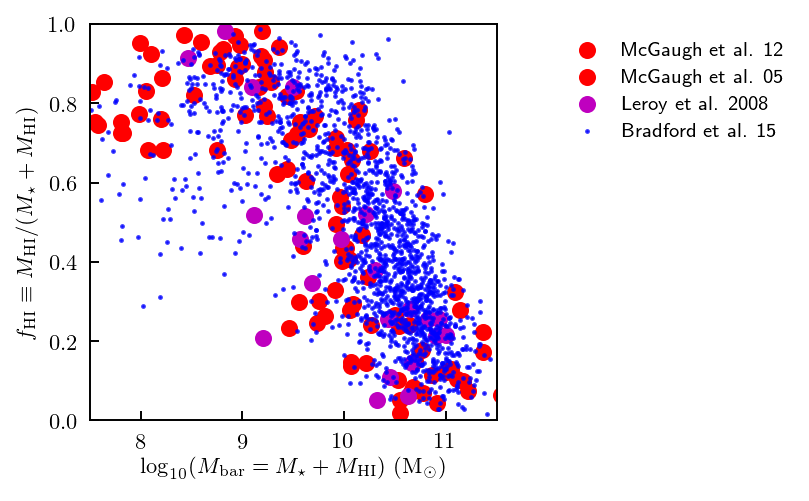

In [12]:
fig, ax = plt.subplots(figsize=(3, 3))

xlabel = r'$\log_{10}(M_{\mathrm{bar}}=M_\star+M_{\mathrm{HI}})\ \mathrm{(M_{\odot})}$'
ylabel = r'$f_{\mathrm{HI}}\equiv M_{\mathrm{HI}}/(M_\star+M_{\mathrm{HI}})$'
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xlim(7.5, 11.5)
ax.set_ylim(0., 1.0)
plt.rc('font',size=11)


#
# plot data from other recent studies of smaller samples
# 
# read in McGaugh 12 M* and MHI
# 
mms,emms, mmHI,emmHI=np.loadtxt(data_home_dir() + "mcgaugh12_tab1.dat",usecols=(4,5,6,7),unpack=True)
mmbar = np.power(10.,mms) + np.power(10.,mmHI+0.1238)
fmg = np.power(10.,mmHI+0.1238)/mmbar
plt.scatter(np.log10(mmbar),fmg,c='r',label='McGaugh et al. 12')

# 
# read in McGaugh 05 M* and MHI
# 
mms2, mmHI2 =np.loadtxt(data_home_dir() + "mcgaugh05_tab1.dat",usecols=(2,3),unpack=True)
mms2 = np.log10(mms2) + 10.0
mmHI2 = np.log10(mmHI2) + 10.0
mmbar2 = np.power(10.,mms2) + np.power(10.,mmHI2+0.1238)
fmg2 = np.power(10.,mmHI2+0.1238)/mmbar2
plt.scatter(np.log10(mmbar2),fmg2,c='r',label='McGaugh et al. 05')

leroy_gals  = ['DDO154','HOI','HOII','IC2574','NGC0628','NGC0925','NGC2403','NGC2841','NGC2976','NGC3077','NGC3184','NGC3198','NGC3351','NGC3521','NGC3627','NGC4214','NGC4449','NGC4736','NGC5055', 'NGC5194', 'NGC6946', 'NGC7331', 'NGC7793']
lgals_stmass = np.array([7.1, 7.4, 8.3, 8.7, 10.1, 9.9, 9.7, 10.8, 9.1, 9.3, 10.3, 10.1, 10.4, 10.7, 10.6, 8.8, 9.3, 10.3, 10.8, 10.6, 10.5, 10.9, 9.5])
lgals_HImass = np.array([8.7, 8.3, 8.9, 9.3,  9.7, 9.8, 9.5, 10.1, 8.3, 9.1,  9.6, 10.1,  9.2, 10.0,  9.0, 8.7, 9.2,  8.7, 10.1,  9.5,  9.8, 10.1, 9.1])
lgals_H2mass = np.array([0.0, 0.0, 0.0, 0.0,  9.0, 8.4, 7.3,  8.5, 7.8, 6.5,  9.2,  8.8,  9.0,  9.6,  9.1, 7.0, 6.9,  8.6,  9.7,  9.4,  9.6,  9.7, 0.0])

lmbar = np.power(10.,(lgals_HImass+0.1238))+np.power(10.,lgals_H2mass)+np.power(10.,lgals_stmass)
fgl = (np.power(10.,(lgals_HImass + 0.1238))+np.power(10.,lgals_H2mass))/lmbar
plt.scatter(np.log10(lmbar), fgl, c='m', label='Leroy et al. 2008')

# 
# read in Bradford, Geha & Blanton 2015 M* and MHI
# 
mbHI, mbs =np.loadtxt(data_home_dir() + "bradford_etal15_table1.txt",usecols=(14,16),unpack=True)
mbHI = np.log10(mbHI) + 0.1238 + 9.0; mbs = np.log10(mbs) + 9.0
mbbar = np.power(10.,mbs) + np.power(10.,mbHI)
fgb = np.power(10.,mbHI)/mbbar
plt.scatter(np.log10(mbbar), fgb, marker='.', c='b', s=4., alpha=0.75, label='Bradford et al. 15')

plt.legend(bbox_to_anchor=(1.75, 1),frameon=False,fontsize=8,loc='upper right')
#plt.savefig('fig/fgmb.pdf',bbox_inches='tight')

plt.show()
